In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud = pd.read_csv('Fraud_check.csv')

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [6]:
fraud['Taxable.Income'].value_counts()

59689    2
42679    1
27143    1
52912    1
61105    1
        ..
94528    1
69224    1
33092    1
14326    1
99325    1
Name: Taxable.Income, Length: 599, dtype: int64

In [7]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"


In [8]:
fraud["income"].unique()
fraud["income"].value_counts()
### dropping the Taxable.Income columns
fraud = fraud.drop(['Taxable.Income'],axis=1)

In [9]:
fraud.tail()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good
599,NO,Divorced,158137,16,NO,Good


In [10]:
le = preprocessing.LabelEncoder()
fraud['Undergrad'] = le.fit_transform(fraud['Undergrad'])
fraud['Marital.Status'] = le.fit_transform(fraud['Marital.Status'])
fraud['Urban'] = le.fit_transform(fraud['Urban'])
fraud['income'] = le.fit_transform(fraud['income'])

In [11]:
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [12]:
x=fraud.iloc[:,0:5]
y=fraud.iloc[:,5]

In [13]:
fraud["income"].value_counts()

0    476
1    124
Name: income, dtype: int64

In [14]:
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [15]:
y_train

3      0
149    0
212    0
585    0
524    1
      ..
440    0
165    0
7      0
219    1
326    1
Name: income, Length: 420, dtype: int32

## building a decision tree classifier with entropy criteria

In [16]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

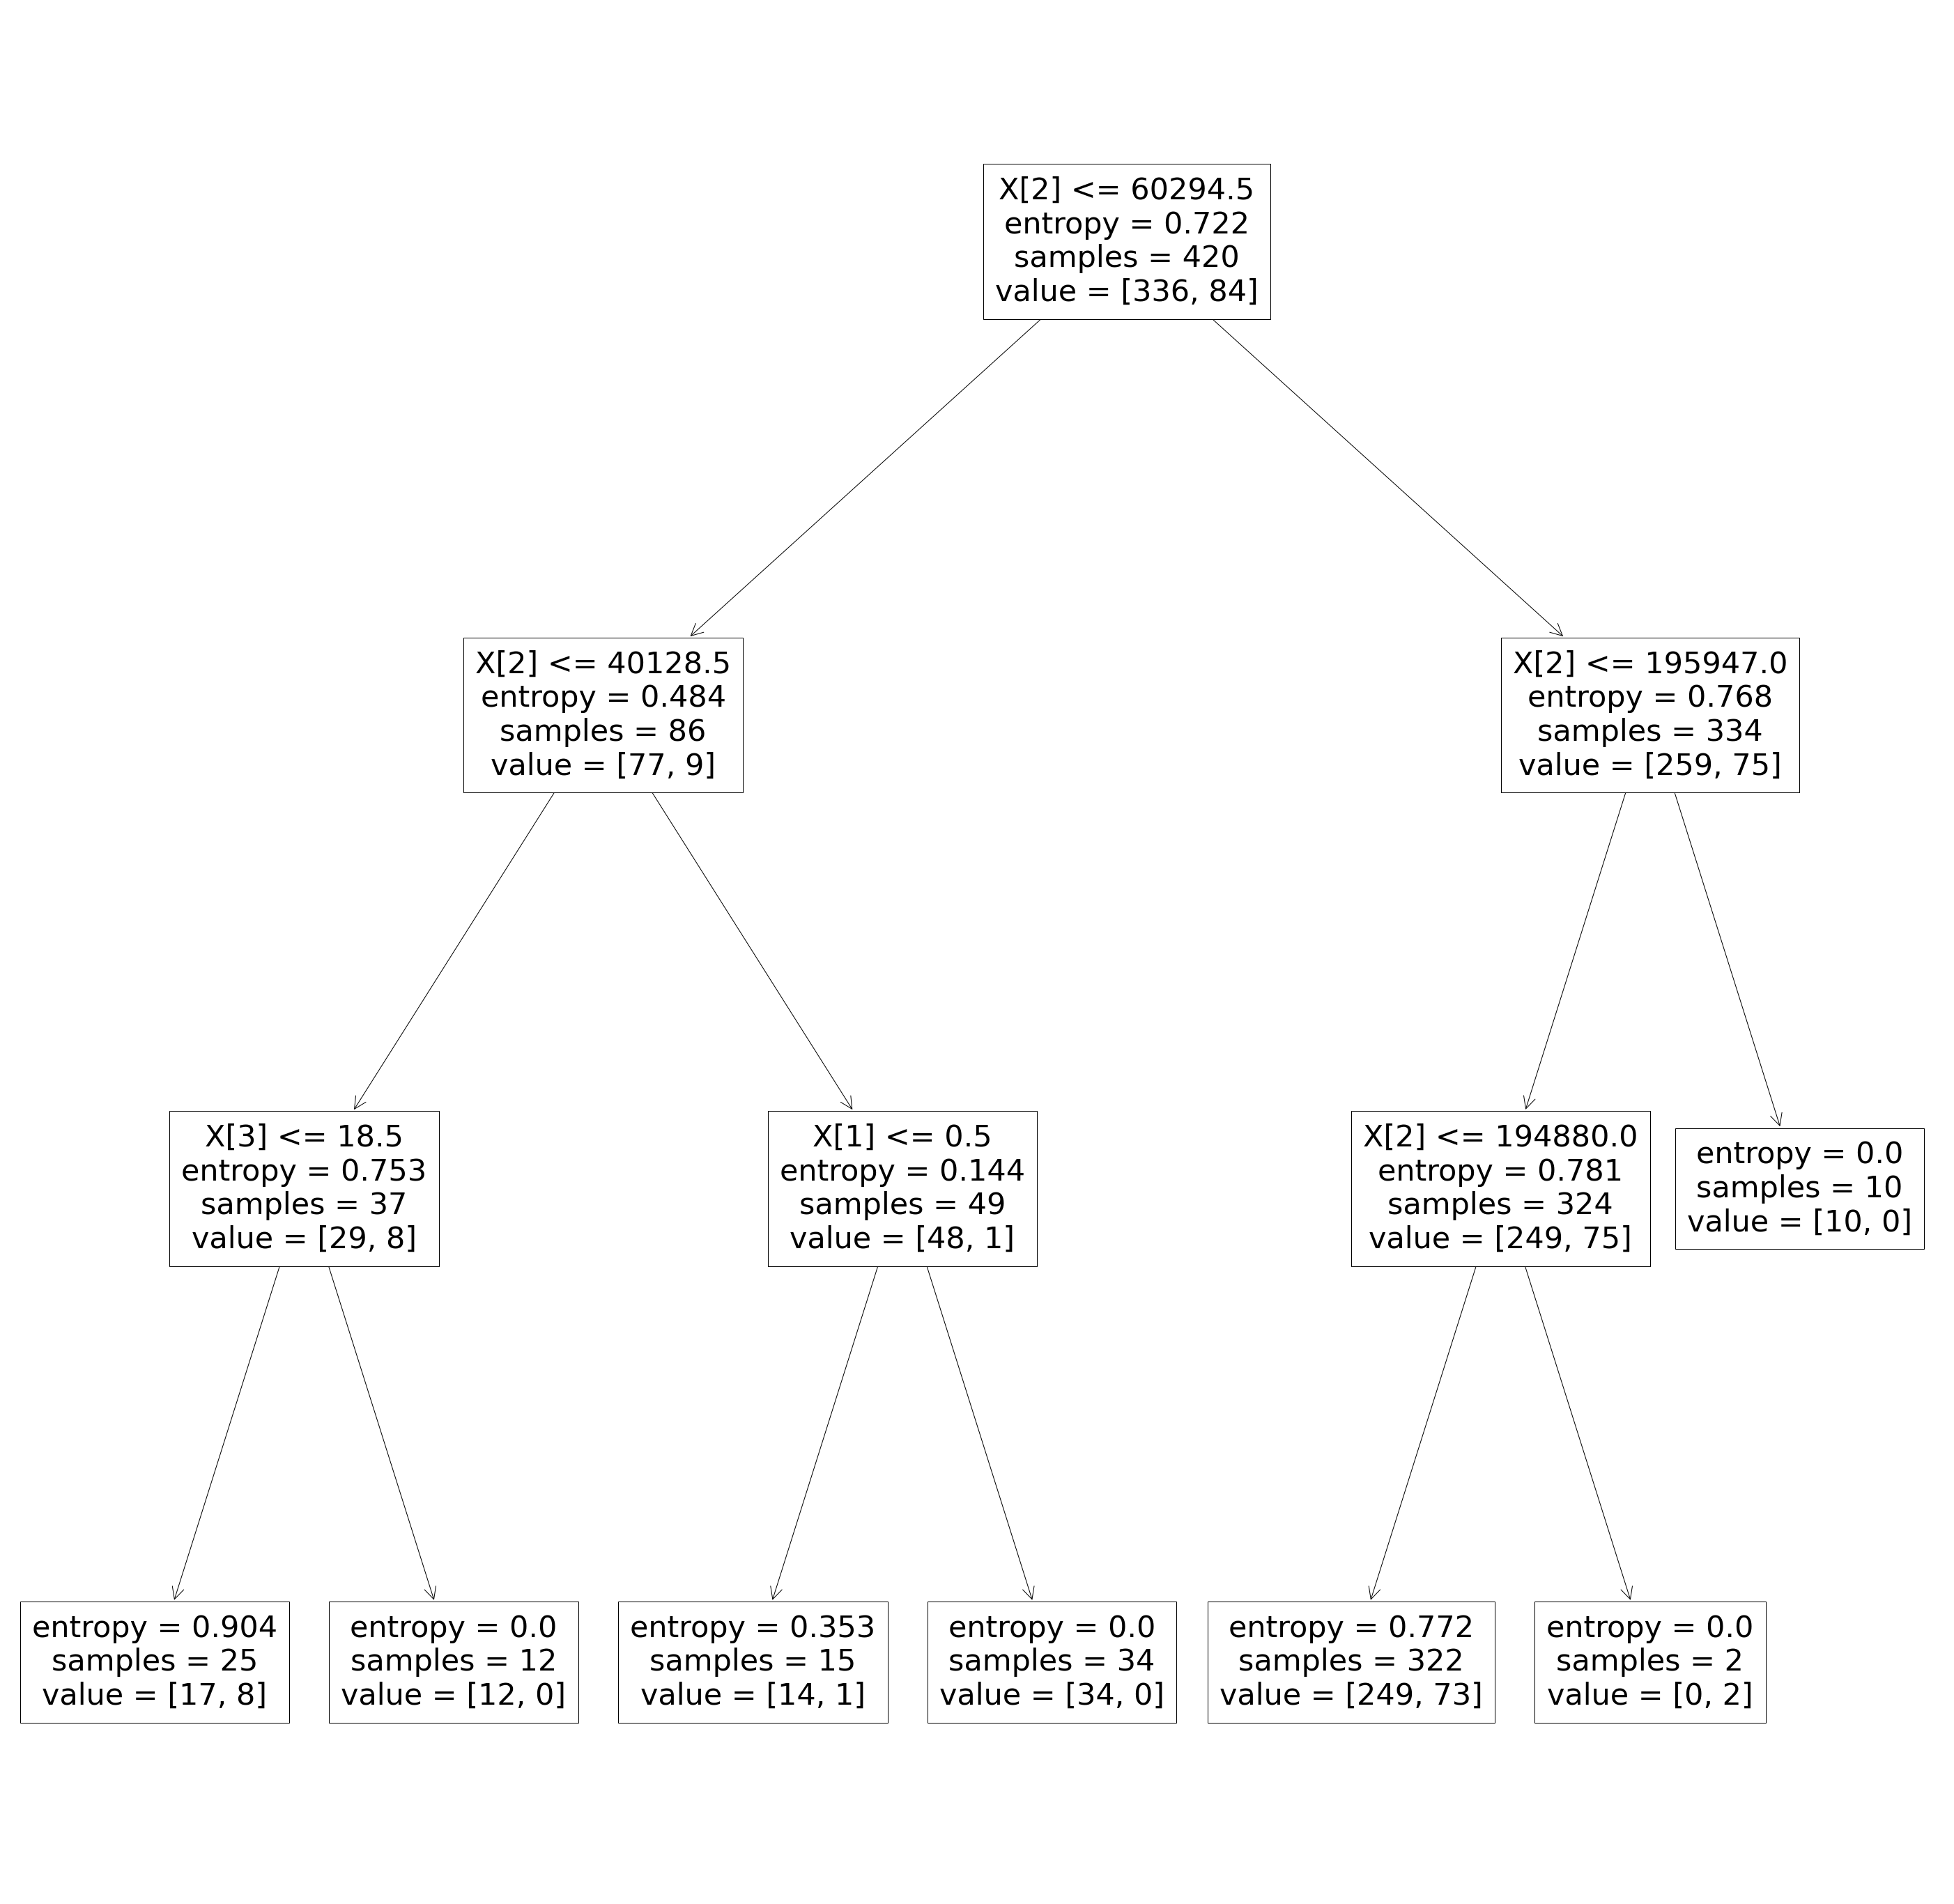

In [17]:
#plot decision tree
fig = plt.figure(figsize=(50,50))
tree.plot_tree(model);

[Text(1609.6153846153845, 2378.25, 'City.Population <= 60294.5\nentropy = 0.722\nsamples = 420\nvalue = [336, 84]'),
 Text(858.4615384615385, 1698.75, 'City.Population <= 40128.5\nentropy = 0.484\nsamples = 86\nvalue = [77, 9]'),
 Text(429.2307692307692, 1019.25, 'Work.Experience <= 18.5\nentropy = 0.753\nsamples = 37\nvalue = [29, 8]'),
 Text(214.6153846153846, 339.75, 'entropy = 0.904\nsamples = 25\nvalue = [17, 8]'),
 Text(643.8461538461538, 339.75, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(1287.6923076923076, 1019.25, 'Marital.Status <= 0.5\nentropy = 0.144\nsamples = 49\nvalue = [48, 1]'),
 Text(1073.076923076923, 339.75, 'entropy = 0.353\nsamples = 15\nvalue = [14, 1]'),
 Text(1502.3076923076924, 339.75, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(2360.769230769231, 1698.75, 'City.Population <= 195947.0\nentropy = 0.768\nsamples = 334\nvalue = [259, 75]'),
 Text(2146.153846153846, 1019.25, 'City.Population <= 194880.0\nentropy = 0.781\nsamples = 324\nvalue

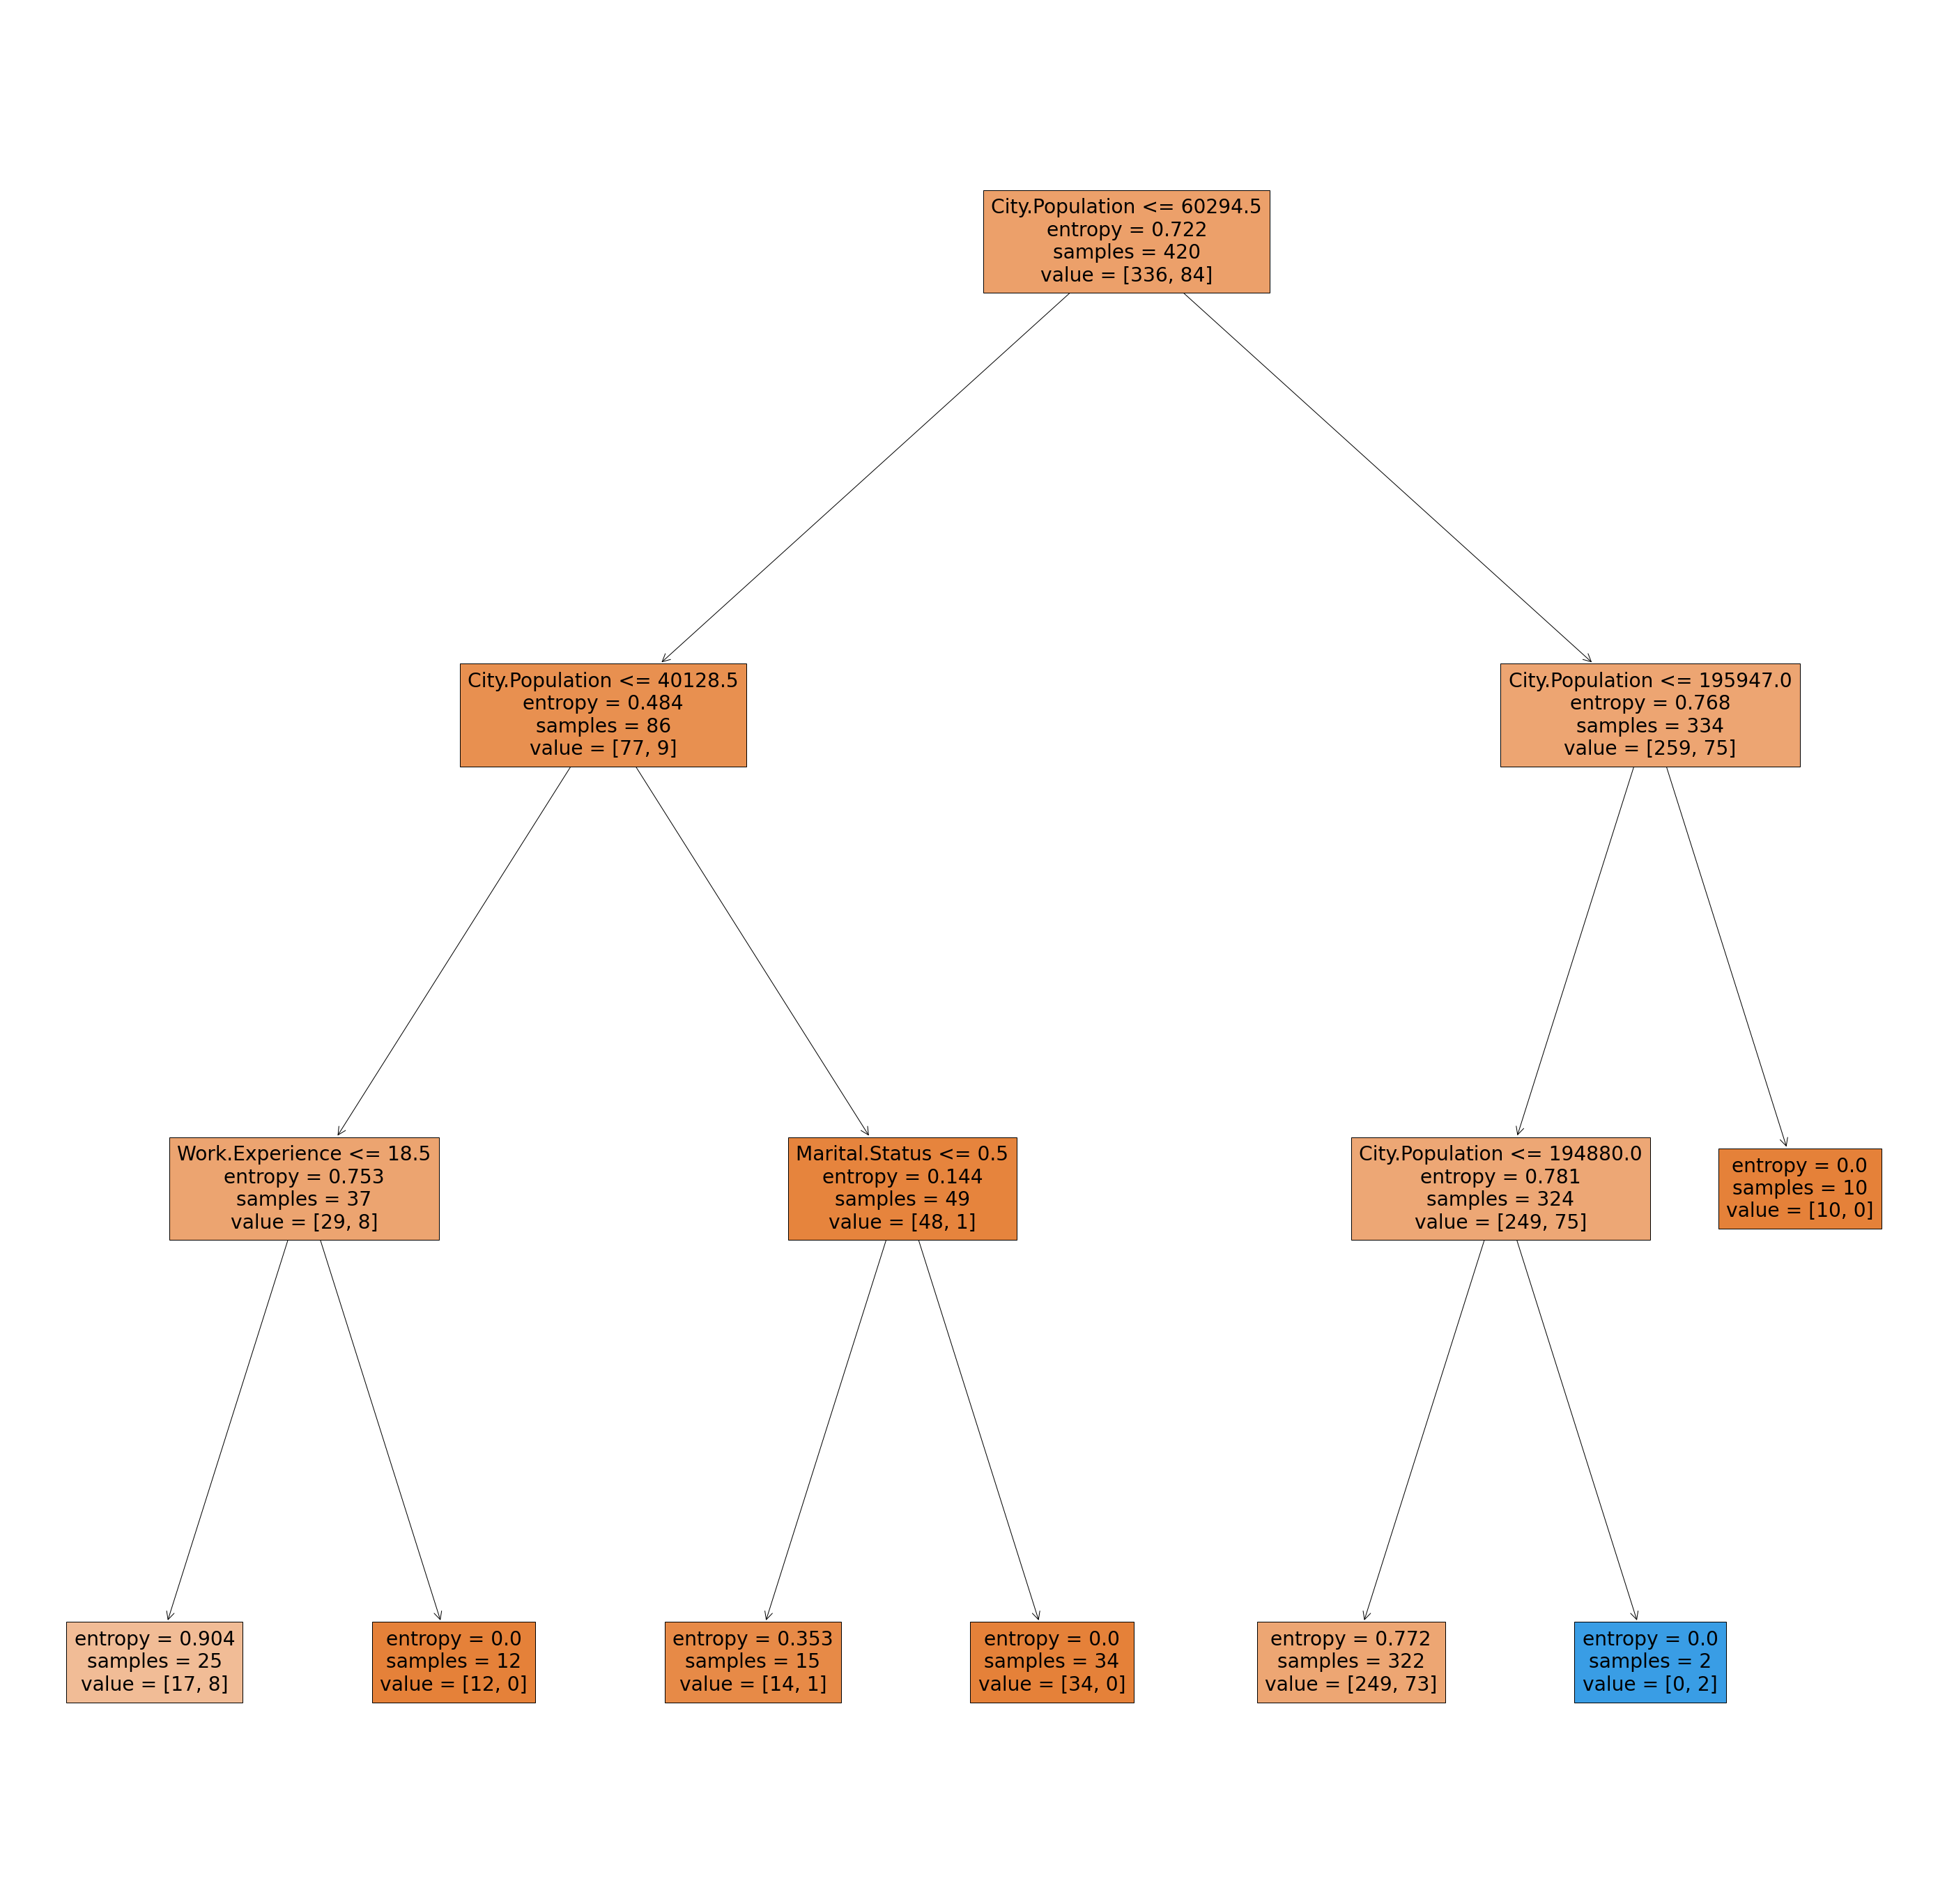

In [18]:
fn = ['Undergrad',
 'Marital.Status',
 'City.Population',
 'Work.Experience',
 'Urban']

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(50,50))
tree.plot_tree(model, feature_names= fn,  filled= True)

In [19]:
#predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.DataFrame(preds) # getting the count of each category 

,0
0,0
1,0
2,0
3,0
4,0
...,...
175,0
176,0
177,0
178,0


In [20]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [21]:
y_test

159    0
307    0
253    0
528    0
137    1
      ..
221    0
390    0
530    0
232    1
139    0
Name: income, Length: 180, dtype: int32

In [23]:
pd.crosstab(y_test,preds)

col_0,0,1
income,,
0,139,1
1,40,0


In [22]:
#Accuracy
np.mean(preds==y_test)#77%

0.7722222222222223

## Building a model using gini criteria

In [25]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3)

In [26]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
#predicting and computing accuracy
pred = model.predict(x_test)
np.mean(preds==y_test)

0.7722222222222223